In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
print(tf.__version__)

1.14.0-rc1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [27]:
train_images.shape

(60000, 28, 28)

In [28]:
len(train_labels)

60000

In [29]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

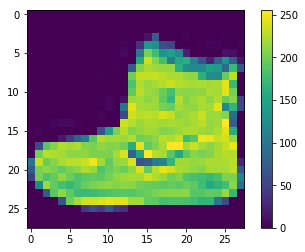

In [30]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
class_names = ['Tshirt/top', 'Trouser', 'Pullover', 'Dress', 'coat', 'sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


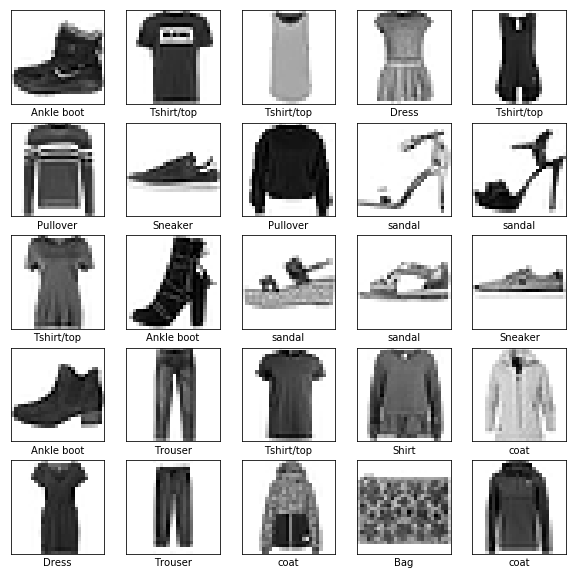

In [33]:
%matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [0]:
#Building the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [36]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.5017 - acc: 0.8230
Epoch 2/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3781 - acc: 0.8641
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3386 - acc: 0.8765
Epoch 4/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3142 - acc: 0.8843
Epoch 5/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2968 - acc: 0.8897


In [37]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy', test_acc)

10000/10000 [==============================] - 0s 38us/sample - loss: 0.3682 - acc: 0.8698
Test accuracy 0.8698


In [0]:
predictions = model.predict(test_images)

In [39]:
predictions[0]

array([2.2289927e-07, 4.7639763e-09, 3.3246515e-08, 3.1987790e-07,
       1.0350818e-06, 1.6651811e-03, 1.3610579e-06, 3.5125330e-02,
       4.1381700e-05, 9.6316516e-01], dtype=float32)

In [40]:
np.argmax(predictions[0])

9

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


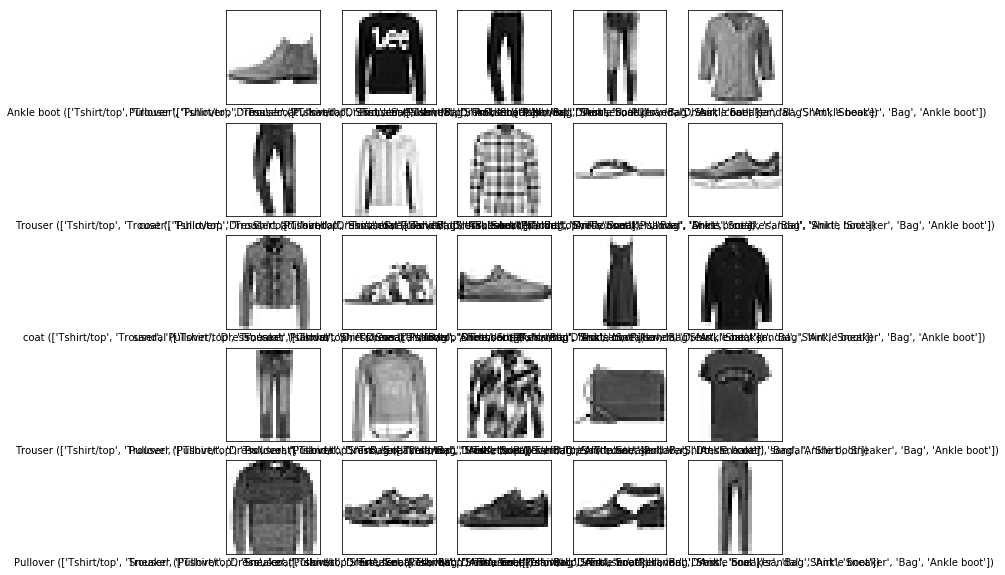

In [41]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  predicted_labels = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_labels == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} ({})".format(class_names[predicted_labels],
                             class_names))

In [42]:
img = test_images[0]

print(img.shape)

(28, 28)
